**Import the Data**

MNIST DATASET

In [ ]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


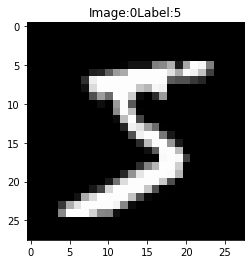

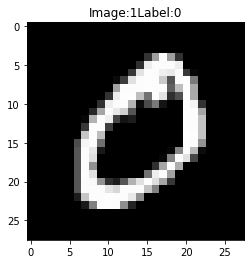

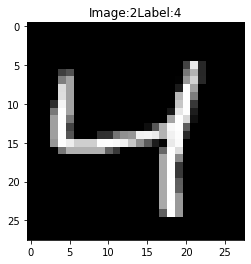

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

for i in range(3):
  plt.figure(i)
  plt.imshow(x_train[i], cmap='gray')
  plt.title("Image:" + str(i) + "Label:" + str(y_train[i]))

**First Task**

DEFINE THE MATRICES

In [ ]:
x_train = x_train.reshape((-1, 28*28))/255
x_test = x_test.reshape((-1, 28*28))/255
 
M = []
N = []
 
L_tr = []
L_te = []
 
for i in range(60000):
  if ((y_train[i]!=0) and ((y_train[i]%2)==0)):
    M.append(x_train[i])
    L_tr.append(y_train[i])
 
for j in range(10000):
  if ((y_test[j]!=0) and ((y_test[j]%2)==0)):
    N.append(x_test[j])
    L_te.append(y_test[j])
 
M = np.array(M)
N = np.array(N)
 
print("M:", M.shape)
print("N:", N.shape)
 
L_tr = np.array(L_tr)
L_te = np.array(L_te)
 
print("L_tr:", L_tr.shape)
print("L_te:", L_te.shape)

M: (23569, 784)
N: (3946, 784)
L_tr: (23569,)
L_te: (3946,)


**Second Task**

RESHAPE THE MATRICES

In [ ]:
import seaborn as sns
import pandas as pd

def RESHAPE(M, L_tr):
  
  #----Create M_reshaped----#

  M_new = len(M)
  M_reshaped = M_new*[0]

  for i in range(M_new): 
    M_reshaped[i] = M[i].reshape(28,28)

  M_reshaped = np.array(M_reshaped)

  print("The shape of M_reshaped matrix is:", M_reshaped.shape)

  #----Even & Odd Means----#

  m = 23569*[0]

  for i in range(23569):
    sum_1=0
    sum_2=0
    for j in range(28):
      # Even
      if j%2==0:
       sum_1 = sum(M_reshaped[i][j])/28+sum_1
      # Odd 
      else:
       sum_2 = sum(M_reshaped[i][j])/28+sum_2
  
  # 23569 x 2 Matrix

    m[i] = [sum_1/14,sum_2/14]
  M_ = np.array(m)
  
  print("The shape of M_ is:",M_.shape)

  return M_

The shape of M_reshaped matrix is: (23569, 28, 28)
The shape of M_ is: (23569, 2)


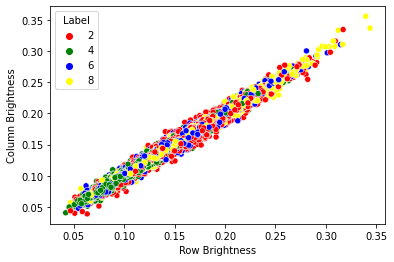

In [ ]:
M_ = RESHAPE(M, L_tr)

Brightness_1 = pd.DataFrame({"Row Brightness":M_[:,0],"Column Brightness": M_[:,1], "Label":L_tr})
sns.scatterplot(data=Brightness_1, x="Row Brightness", y="Column Brightness", hue="Label", palette = ["red", "green", "blue", "yellow"])
plt.show(block=False)

**Third Task**

K - MEAN ALGORITHM

In [ ]:
from sklearn import metrics
 
#---M_: Data, k: Number of clusters, no: Number of iterations, init_centers: Initialization of k - mean
 
def KMEAN(M_, k, init_centers, no=10):
 
  Clusters = np.array(init_centers, dtype=float)
  Labels = np.zeros(len(M_), dtype=float)
 
  #---Correspond Datapoints to Each Cluster Based on Minimum Eucleidian Diastance---#

  for i in range(len(M_)):
    min_distance = (sum((Clusters[0] - M_[i,:])**2))**0.5
    for j in range(k):
      if (sum((Clusters[j] - M_[i,:])**2))**0.5 < min_distance:
        min_distance = (sum((Clusters[j] - M_[i,:])**2))**0.5
        Labels[i] = j
 
  for n in range(no):
 
    centroids = []

  #---Correspond Datapoints to Each Cluster Based on Minimum Eucleidian Diastance---#

    for idx in range(k):

  #---Updating Centroids by taking mean of Cluster---#

       temp_cent = M_[Labels==idx].mean(axis=0) 
       centroids.append(temp_cent)
 
    for i in range(len(M_)):
      min_distance = (sum((centroids[0] - M_[i,:])**2))**0.5
      for j in range(k):
        if (sum((centroids[j] - M_[i,:])**2))**0.5 < min_distance:
          min_distance = (sum((centroids[j] - M_[i,:])**2))**0.5
          Labels[i] = j

  #---Purity---#

  contingency_matrix = metrics.cluster.contingency_matrix(L_tr, Labels)
  Purity = np.sum(np.amax(contingency_matrix, axis = 0)) / np.sum(contingency_matrix)
  print(Purity)
  
  return Labels, Purity

MAXIMIN ALGORITHM

In [ ]:
def MAXIMIN(M_):
  
  Clusters = []
  All = []

  L_trnew = len(M_)

  #----First Center----#

  Cluster_1 = 0
  All.append(Cluster_1)

  #----Most Distant Center & Euclidean Distance----#

  max1 = 0
  Cluster_2 = 0

  for i in range(L_trnew):

    d_1 = (sum((M_[Cluster_1,:] - M_[i,:])**2))**0.5
    if d_1 > max1:

      d_1 = max1
      Cluster_2 = i 
  All.append(Cluster_2)

  #----K = 3 & K = 4 Cluster Centers----#

  max2 = 0 
  Cluster_3 = 0
  Cluster_4 = 0

  for i in range(L_trnew):
    d_1 = (sum((M_[Cluster_1,:] - M_[i,:])**2))**0.5
    d_2 = (sum((M_[Cluster_2,:] - M_[i,:])**2))**0.5
    if min(d_1,d_2) > max2:
      max1 = min(d_1,d_2)
      Cluster_3 = i

  for i in range(L_trnew):

    d_1 = (sum((M_[Cluster_1,:] - M_[i,:])**2))**0.5
    d_2 = (sum((M_[Cluster_2,:] - M_[i,:])**2))**0.5
    d_3 = (sum((M_[Cluster_3,:] - M_[i,:])**2))**0.5
    if min(d_1,d_2,d_3) > max2:
        max1 = min(d_1,d_2,d_3)
        Cluster_4 = i 

  All.append(Cluster_3)
  All.append(Cluster_4)

  for i in All : 
      Clusters.append(M_[i,:])

  print("centers of Clusters:",Clusters )

  return Clusters

APPLY K - MEAN ALGORITHM IN DATA

centers of Clusters: [array([0.0970088, 0.097499 ]), array([0.10611244, 0.10317127]), array([0.10071028, 0.10365146]), array([0.12973189, 0.12839136])]
0.3292460435317578


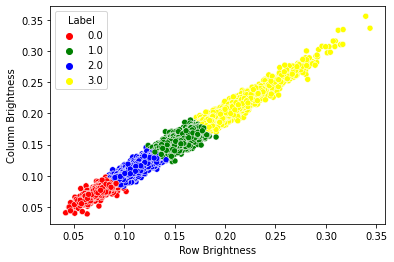

In [ ]:
Clusters = MAXIMIN(M_)
Labels, Purity = KMEAN(M_, 4, Clusters, 50)  

Brightness_2 = pd.DataFrame({"Row Brightness":M_[:,0],"Column Brightness": M_[:,1], "Label":Labels})
sns.scatterplot(data=Brightness_2, x="Row Brightness", y="Column Brightness", hue="Label", palette = ["red", "green","blue", "yellow"])
plt.show(block=False)

**Fourth Task**

PCA ANALYSIS

In [ ]:
def PCA(Data, L_tr, V):

  #---Center Data---#

  Data_centered = Data - np.mean(Data , axis = 0)
     
  #---Covariance Matrix---#

  Covariance = np.cov(Data_centered , rowvar = False)
     
  #---Eiges---#

  Eigen_values , Eigen_vectors = np.linalg.eigh(Covariance)
     
  #---Shorting the Data---#

  Sorted_index = np.argsort(Eigen_values)[::-1]
  Sorted_eigenvalue = Eigen_values[Sorted_index]
  Sorted_Eigen_vectors = Eigen_vectors[:,Sorted_index]

  Eigen_vector_subset = Sorted_Eigen_vectors[:,:V]
     
  #---New Matrix---#

  M_Reduced = np.dot(Eigen_vector_subset.transpose() , Data_centered.transpose() ).transpose()
  print("Reduced Matrix is:", M_Reduced)

  Labels, Purity = KMEAN(M_, 4, Clusters, 50)
  return M_Reduced, Labels, Purity

APPLY PCA ALGORITHM IN DATA

Reduced Matrix is: [[ 2.54158588 -1.9611792 ]
 [-0.382335    0.7955134 ]
 [ 1.22260238 -1.75703615]
 ...
 [-2.96172185 -1.5150584 ]
 [ 1.64762737  1.24429653]
 [-1.2951232  -0.91577092]]
0.3292460435317578


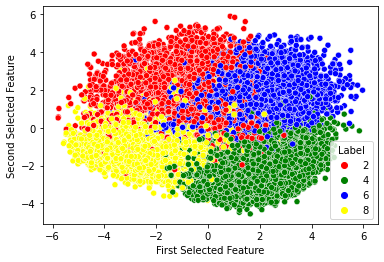

In [ ]:
M_Reduced_2, Labels, Purity_2 = PCA(M[:,:], L_tr, 2)

PCA_graph = pd.DataFrame({"First Selected Feature":M_Reduced_2[:,0],"Second Selected Feature": M_Reduced_2[:,1], "Label":L_tr})
sns.scatterplot(data=PCA_graph, x="First Selected Feature", y="Second Selected Feature", hue="Label", palette = ["red", "green","blue", "yellow"])
plt.show(block=False)

Reduced Matrix is: [[ 2.54158588 -1.9611792 ]
 [-0.382335    0.7955134 ]
 [ 1.22260238 -1.75703615]
 ...
 [-2.96172185 -1.5150584 ]
 [ 1.64762737  1.24429653]
 [-1.2951232  -0.91577092]]
0.3292460435317578
centers of Clusters: [array([ 2.54158588, -1.9611792 ]), array([-1.2951232 , -0.91577092]), array([1.64762737, 1.24429653]), array([-2.96172185, -1.5150584 ])]
0.6437693580550723


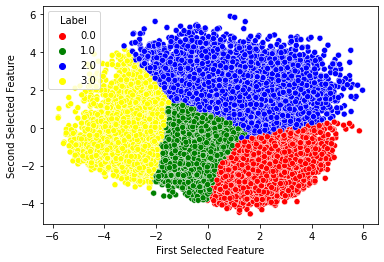

In [ ]:
#---K - MEAN for M_Reduced_2---#

M_Reduced_2, Labels, Purity_2 = PCA(M[:,:], L_tr, 2)
Labels, Purity_2 = KMEAN(M_Reduced_2, 4, MAXIMIN(M_Reduced_2))

PCA_graph_2 = pd.DataFrame({"First Selected Feature":M_Reduced_2[:,0],"Second Selected Feature": M_Reduced_2[:,1], "Label":Labels})
sns.scatterplot(data=PCA_graph_2, x="First Selected Feature", y="Second Selected Feature", hue="Label", palette = ["red", "green","blue", "yellow"])
plt.show(block=False)

In [ ]:
M_Reduced_25, Labels, Purity_25 = PCA(M[:,:], L_tr, 25)
M_Reduced_50, Labels, Purity_50 = PCA(M[:,:], L_tr, 50)
M_Reduced_100, Labels, Purity_100 = PCA(M[:,:], L_tr, 100)
 
Labels, Purity_25 = KMEAN(M_Reduced_25, 4, MAXIMIN(M_Reduced_25))
Labels, Purity_50 = KMEAN(M_Reduced_50, 4, MAXIMIN(M_Reduced_50))
Labels, Purity_100 = KMEAN(M_Reduced_100, 4, MAXIMIN(M_Reduced_100))

Reduced Matrix is: [[ 2.54158588 -1.9611792   0.05908965 ... -0.15467593  0.27095688
  -0.97328913]
 [-0.382335    0.7955134  -0.51387409 ... -1.10073786  1.47910825
  -0.70022441]
 [ 1.22260238 -1.75703615 -2.38259948 ... -0.20575164  0.81332452
   0.23563989]
 ...
 [-2.96172185 -1.5150584  -0.16977651 ... -0.38431004 -0.95177552
   0.45830841]
 [ 1.64762737  1.24429653 -2.71223973 ... -0.1738246  -0.21041403
  -0.25667303]
 [-1.2951232  -0.91577092 -1.80474161 ...  0.05238786  0.77703166
   0.41625989]]
0.3292460435317578
Reduced Matrix is: [[ 2.54158588 -1.9611792   0.05908965 ...  0.01103581  0.64977975
   0.24972497]
 [-0.382335    0.7955134  -0.51387409 ...  0.35260969  0.45624407
   0.50541571]
 [ 1.22260238 -1.75703615 -2.38259948 ... -0.01327736 -0.19671573
  -0.9706301 ]
 ...
 [-2.96172185 -1.5150584  -0.16977651 ... -0.50787265 -0.8800708
   0.19000193]
 [ 1.64762737  1.24429653 -2.71223973 ...  0.37668306 -0.13131811
  -0.40443989]
 [-1.2951232  -0.91577092 -1.80474161 ... 

**Fifth Task**

NAIVE BAYES CLASSIFIER

In [ ]:
N_Reduced_2, Labels, Purity_2 = PCA(N[:,:], L_tr, 2)

Reduced Matrix is: [[ 2.27053819  2.0778612 ]
 [-2.74208454 -2.13651346]
 [-0.89655011 -3.82318626]
 ...
 [ 2.98337647  2.77660621]
 [ 0.04255193 -2.45695669]
 [-2.69516041  4.91867355]]
0.3292460435317578


In [ ]:
N, = L_tr.shape
print(N)

23569


In [ ]:

L_tr = L_tr. astype(int)
N,=L_tr.shape
for C in range(N):

  if L_tr[C]==2:

      L_tr[C]=0
  if L_tr[C]==4:

       L_tr[C]=1
  if L_tr[C]==6:

       L_tr[C]=2
  if L_tr[C]==8:

      L_tr[C]=3

print(L_tr)

[1 0 1 ... 3 2 3]


In [ ]:
L_te = L_te. astype(int)
N,=L_te.shape
for C in range(N):

  if L_te[C]==2:

      L_te[C]=0
  if L_te[C]==4:

       L_te[C]=1
  if L_te[C]==6:

       L_te[C]=2
  if L_te[C]==8:

      L_te[C]=3

print(L_te)

[0 1 1 ... 0 1 2]


In [ ]:
# Calculate accuracy percentage between two lists

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
import autograd.numpy as np
from autograd.scipy.stats import multivariate_normal as mvn

def NAIVEBAYES(X_train, y_train, X_test):
  gaussians = dict()
  prior_probabs= dict()
  label_train = set(y_train)

  
  #---label_test = set(y_test)---#

  for c in label_train:
    print("mpjke sthn loypa",c)
    current_X = X_train[y_train==c]
    gaussians[c] = {
        'mean':current_X.mean(axis=0), # Mean for each digit.
        'cov' : current_X.var(axis=0)+1e-2 # Covariance for each digit with addition of a little noise to avoid singularity.
    }
    print(gaussians)

    prior probability is the number of times class occured divided by the sample length
    prior_probabs[c] = float(len([y_train==c]))/len(y_train)
    N, D = X_test.shape
    Probabilties = np.zeros((N, len(gaussians))) # Array of zeros to store probability for each class.
    print(Probabilties.shape)

    #---Calculating the probabilities---#
    
    for c, g in gaussians.items():
      mean, cov = g['mean'], g['cov']
      Probabilties[:,c] = mvn.logpdf(X_test, mean=mean, cov=cov) + np.log(prior_probabs[c])
    Prediction = np.argmax(Probabilties, axis=1)
  
  return Prediction

In [ ]:
print("M_Reduced_2.shape=",M_Reduced_2.shape)
print("L_tr=",L_tr.shape)
print("N_Reduced_2=",N_Reduced_2.shape)
print(type(M_Reduced_2))
print(type(L_tr))
print(type(N_Reduced_2))

M_Reduced_2.shape= (23569, 2)
L_tr= (23569,)
N_Reduced_2= (3946, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Prediction= NAIVEBAYES(M_Reduced_2, L_tr, N_Reduced_2)
acc=accuracy_metric(L_te,Prediction)
print("The accuracy is", acc, "%")

mpjke sthn loypa 0
{0: {'mean': array([-0.74355272,  1.53645049]), 'cov': array([2.18009976, 1.99935077])}}
(3946, 1)
mpjke sthn loypa 1
{0: {'mean': array([-0.74355272,  1.53645049]), 'cov': array([2.18009976, 1.99935077])}, 1: {'mean': array([ 1.73450188, -2.08952722]), 'cov': array([1.57021136, 1.103017  ])}}
(3946, 2)
mpjke sthn loypa 2
{0: {'mean': array([-0.74355272,  1.53645049]), 'cov': array([2.18009976, 1.99935077])}, 1: {'mean': array([ 1.73450188, -2.08952722]), 'cov': array([1.57021136, 1.103017  ])}, 2: {'mean': array([1.1913572 , 1.55027102]), 'cov': array([2.39832327, 1.26888851])}}
(3946, 3)
mpjke sthn loypa 3
{0: {'mean': array([-0.74355272,  1.53645049]), 'cov': array([2.18009976, 1.99935077])}, 1: {'mean': array([ 1.73450188, -2.08952722]), 'cov': array([1.57021136, 1.103017  ])}, 2: {'mean': array([1.1913572 , 1.55027102]), 'cov': array([2.39832327, 1.26888851])}, 3: {'mean': array([-2.17968292, -1.0462584 ]), 'cov': array([1.78298772, 0.84135255])}}
(3946, 4)
The 